In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from scipy import interpolate
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [27]:
# Read in netcdf data

ds = nc.Dataset('/Users/clara.henry/Documents/Derwael/Code/DerwaelBC.nc')
bedrock_old = np.array(ds.variables['bed'][:])
upper_surface_old = np.array(ds.variables['zs0'][:])
lower_surface_old = np.array(ds.variables['zb0'][:])
X = np.array(ds.variables['x'][:])
Y = np.array(ds.variables['y'][:])


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/157810954.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


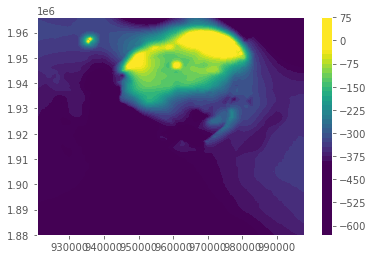

In [28]:
# Plot the new data

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,bedrock_old, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)

In [29]:
# Read in the fixed interpolation

ds = nc.Dataset('/Users/clara.henry/Documents/Derwael/Code/DerwaelFixedBedInterpolation.nc')
lower_surface_fixed = np.array(ds.variables['zb'][:])


In [30]:
upper_surface_old.shape, lower_surface_fixed.shape

((173, 156), (173, 156))

In [31]:
# Read in stratigraphy data

radardata = {}
for i in range(1,8):
    radardata['data' + str(i)] = pd.read_csv('../Data/AdjustedRadarStatigraphy/Observed/RadarSegment' + str(i) + '.csv', sep=",")
radardata


{'data1':       index        psX        psY   base  IRH0    Surface  StratElev1  \
 0         0  961154.51  1956754.7  178.2     0   7.360430         NaN   
 1         1  961159.69  1956751.7  178.4     0   7.700226         NaN   
 2         2  961164.87  1956748.6  178.7     0   8.049260         NaN   
 3         3  961170.05  1956745.6  178.7     0   8.401228         NaN   
 4         4  961175.23  1956742.5  179.1     0   8.762635         NaN   
 ...     ...        ...        ...    ...   ...        ...         ...   
 5195   5195  987891.95  1940631.6  321.8     0  33.207766   28.802378   
 5196   5196  987896.27  1940627.4  321.8     0  33.209596   28.603297   
 5197   5197  987900.59  1940623.3  321.8     0  33.211438   28.605139   
 5198   5198  987904.90  1940619.1  321.8     0  33.213361   28.607061   
 5199   5199  987909.22  1940614.9  321.8     0  33.215331   28.609032   
 
       StratElev2  StratElev3  StratElev4  StratElev5  StratElev6  StratElev7  \
 0            NaN   

In [32]:
count = 0

for x in X:
    if x < 998000:
        count += 1


In [33]:
# Remove the pinning point (comment out otherwise)

#for i in range(40):
#    for j in range(len(Y)):
#        if bedrock_old[j][i] > -300:
#            bedrock_old[j][i] = -300

In [34]:
for i in range(140,156):
    for j in range(len(Y)):
        if upper_surface_old[j][i] < 20:
            upper_surface_old[j][i] = 20
            lower_surface_old[j][i] = -180


In [35]:
# Make ice shelf equal thickness everywhere

for i in range(len(X)):
    for j in range(len(Y)):
        if lower_surface_old[j][i] > -90:
            if bedrock_old[j][i] > -90:
                lower_surface_old[j][i] = bedrock_old[j][i]
            else:
                lower_surface_old[j][i] = -90

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/1930805458.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


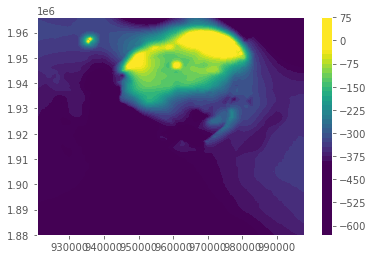

In [36]:
# Plot the new data

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,bedrock_old, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


In [37]:
# Code to replace values within a certain rectangle

#for i in range(len(X)):
#    for j in range(len(Y)):
#        if (X[i] > x0) and (X[i] < x1):
#            if (Y[j] > y0) and (Y[j] < y1):
#                bedrock_old[j][i] = NewValue
#                lower_surface_old[j][i] = NewValue
                
def RemoveAnomaly(x0, y0, x1, y1, NewValue):
    for i in range(len(X)):
        for j in range(len(Y)):
            if (X[i] > x0) and (X[i] < x1):
                if (Y[j] > y0) and (Y[j] < y1):
                    bedrock_old[j][i] = NewValue
                    lower_surface_old[j][i] = NewValue

RemoveAnomaly(959000, 1918000, 968000, 1921000, -440)
RemoveAnomaly(965000, 1915000, 969000, 1919000, -440)
RemoveAnomaly(951000, 1921000, 955000, 1924000, -440)
RemoveAnomaly(949000, 1922000, 954000, 1925000, -440)
RemoveAnomaly(948000, 1924000, 953000, 1926000, -440)
RemoveAnomaly(947000, 1927000, 950500, 1928000, -440)
RemoveAnomaly(946000, 1927000, 950000, 1928500, -440)
RemoveAnomaly(946000, 1927500, 949500, 1929000, -440)
RemoveAnomaly(945000, 1928000, 949000, 1929500, -440)
RemoveAnomaly(944000, 1928500, 948500, 1930000, -440)
RemoveAnomaly(943000, 1929000, 948000, 1930500, -440)
RemoveAnomaly(942000, 1929500, 947500, 1931000, -440)
RemoveAnomaly(941000, 1930000, 947000, 1931500, -440)



In [38]:
# Reduce height of all points higher than an elevation of -100 in both the zb database and 
# correspondingly in the bed database

# Original

for i in range(len(X)):
    for j in range(len(Y)):
        if bedrock_old[j][i] > -100:
            bedrock_old[j][i] = bedrock_old[j][i]/20.0 - 95.0
            lower_surface_old[j][i] = lower_surface_old[j][i]/20.0 - 95.0

# Lower bed

#for i in range(len(X)):
#    for j in range(len(Y)):
#        if bedrock_old[j][i] > -120:
#            bedrock_old[j][i] = bedrock_old[j][i]/20.0 - 105.0
#            lower_surface_old[j][i] = lower_surface_old[j][i]/20.0 - 105.0


In [39]:
# Replace the subdomain with the fixed interpolation 

lower_surface_fixed = np.flipud(lower_surface_fixed)
bedrock_fixed = lower_surface_fixed.copy()



/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/364237631.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


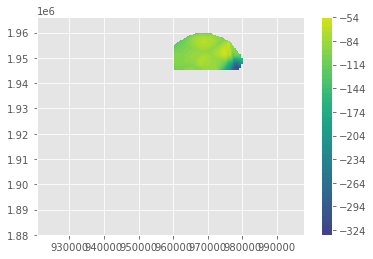

In [40]:
fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,lower_surface_fixed, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/1127818321.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


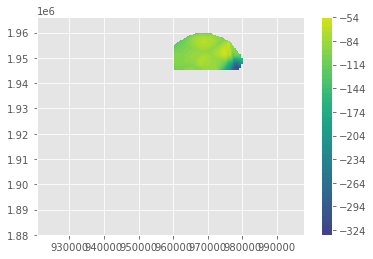

In [41]:
fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,bedrock_fixed, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


In [42]:
lower_surface_fixed[np.isnan(lower_surface_fixed)] = lower_surface_old[np.isnan(lower_surface_fixed)]
bedrock_fixed[np.isnan(bedrock_fixed)] = bedrock_old[np.isnan(bedrock_fixed)]

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/3590548462.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


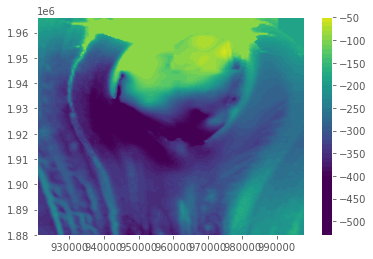

In [43]:
# Plot the new data

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,lower_surface_fixed, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/1127818321.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


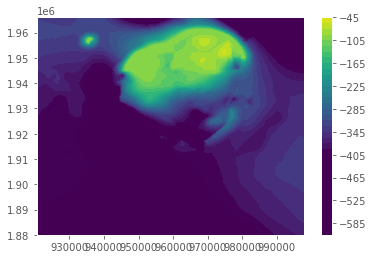

In [44]:
fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,bedrock_fixed, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


In [45]:
# Apply a Gaussian filter

sigma_x = 2.0
sigma_y = 2.0

sigma = [sigma_x, sigma_y]
#bedrock_fixed = sp.ndimage.gaussian_filter(bedrock_fixed, sigma, mode='constant')
lower_surface_fixed = sp.ndimage.gaussian_filter(lower_surface_fixed, sigma, mode='constant')


In [46]:
# Read in the data that gives a polygon for the grounding line

dfGL = pd.read_csv("../Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::50], list(dfGL["Points:1"])[::50]))

# [list(dfGL["Points:0"]), list(dfGL["Points:1"])]
alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

poly = Polygon(zip(list(hull_pts[0]), list(hull_pts[1])))

#lower_surface_fixed_GL = bedrock_fixed.copy()
bedrock_fixed_GL = lower_surface_fixed.copy()

for i in range(len(X)):
    for j in range(len(Y)):
        boolean = poly.contains(Point(X[i], Y[j]))
        if boolean == False:
            #lower_surface_fixed_GL[j][i] = "nan"
            bedrock_fixed_GL[j][i] = "nan"

#lower_surface_fixed_GL[np.isnan(lower_surface_fixed_GL)] = lower_surface_old[np.isnan(lower_surface_fixed_GL)]
bedrock_fixed_GL[np.isnan(bedrock_fixed_GL)] = bedrock_old[np.isnan(bedrock_fixed_GL)]


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/1582543800.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


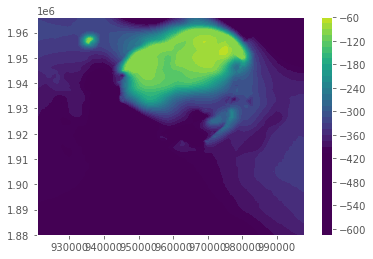

In [47]:
# Plot the new data

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y,bedrock_fixed_GL, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_21315/856720839.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


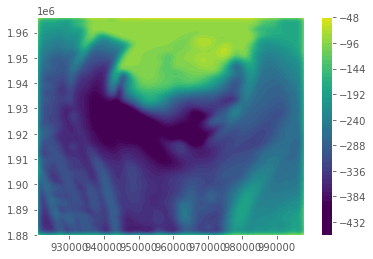

In [48]:
fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y, lower_surface_fixed, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)

In [49]:
# Lower the bed on the eastern side of the ice rise

#for i in range(len(X)):
#    for j in range(len(Y)):
#        if X[i] > 980000:
#            bedrock_old[j][i] = bedrock_old[j][i] - 70
#            if lower_surface_old[j][i] < bedrock_old[j][i]:
#                lower_surface_old[j][i] = lower_surface_old[j][i]


In [50]:

bedrock_new = bedrock_fixed_GL
upper_surface_new = upper_surface_old
lower_surface_new = lower_surface_fixed

da_bed = xr.DataArray(
    data=bedrock_new,
    dims=['y', 'x'],
    coords=dict(
        x=X,
        y=Y
    
    )
)

da_upp = xr.DataArray(
    data=upper_surface_new,
    dims=['y', 'x'],
    coords=dict(
        x=X,
        y=Y
    
    )
)

da_low = xr.DataArray(
    data=lower_surface_new,
    dims=['y', 'x'],
    coords=dict(
        x=X,
        y=Y
    
    )
)

da_bed.to_netcdf('DerwaelNewBedrock.nc')
da_upp.to_netcdf('DerwaelUpper.nc')
da_low.to_netcdf('DerwaelLower.nc')
da_bed.close()
da_upp.close()
da_low.close()
da_bed


<xarray.DataArray (y: 173, x: 156)>
array([[-334.2401123 , -334.93426514, -335.97546387, ..., -546.82159424,
        -542.83026123, -538.66540527],
       [-333.02536011, -333.19888306, -333.89303589, ..., -546.99511719,
        -542.83026123, -539.35955811],
       [-330.42233276, -331.11645508, -331.46353149, ..., -546.64801025,
        -542.83026123, -539.88012695],
       ...,
       [-431.24667358, -432.11434937, -433.32910156, ..., -371.8973999 ,
        -371.20324707, -369.98849487],
       [-432.11434937, -433.32910156, -434.89093018, ..., -372.41799927,
        -372.07092285, -371.20324707],
       [-433.32910156, -435.41152954, -436.62628174, ..., -373.63275146,
        -372.93859863, -372.59155273]])
Coordinates:
  * x        (x) float64 9.205e+05 9.21e+05 9.215e+05 ... 9.975e+05 9.98e+05
  * y        (y) float64 1.966e+06 1.966e+06 1.965e+06 ... 1.88e+06 1.88e+06